In [3]:
# import required libraries
import math as math              # for maths functions such as sqrt, log10, fmod
import numpy as np               # for array of state data
import matplotlib.pyplot as plt  # for plotting
import matplotlib.gridspec as gridspec
import time                      # for recording cpu time
import random
from scipy import fft

from Control_MYO import Filters

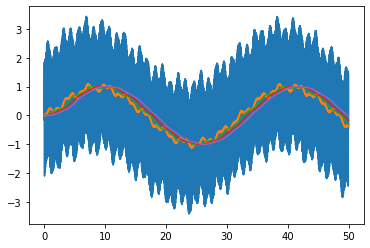

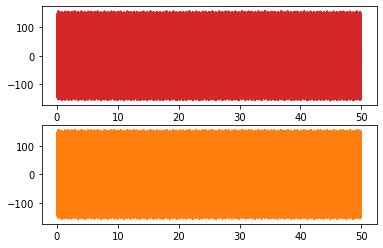

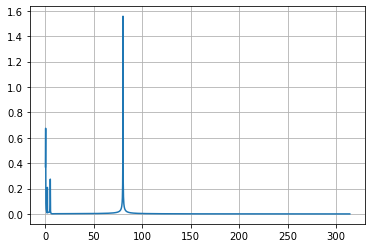

In [4]:
# Filter test
omega = 0.2
omega2 = 5
omega3 = 2
t0 = 0
dt = 0.01
tF = 50
t_vec = np.arange(t0,tF,dt)
signal = 1*np.sin(omega*t_vec) + 0.2*np.sin(omega3*t_vec + math.pi/4) + 0.3*np.sin(omega2*t_vec - math.pi/2) + 2*np.sin(80*t_vec)
signal_cos = 1*np.cos(omega*t_vec)

signal_f1 = np.zeros(t_vec.size)
signal_f2 = np.zeros(t_vec.size)
signal_f3 = np.zeros(t_vec.size)
signal_f4 = np.zeros(t_vec.size)
signal_n1 = np.zeros(t_vec.size)
signal_n2 = np.zeros(t_vec.size)
signal_h1 = np.zeros(t_vec.size)
signal_d1 = np.zeros(t_vec.size)
signal_db = np.zeros(t_vec.size)

x_filter1 = np.array([[0]]) # 1st order filter
x_filter2 = np.array([[0],
                      [0]]) # 2nd order filter
x_filter3 = np.array([[0],
                      [0],
                      [0]]) # 3rd order filter
x_filter4 = np.array([[0],
                      [0],
                      [0],
                      [0]]) # 3rd order filter

x_notch1 = np.array([[0],
                     [0]]) # Notch filter
x_notch2 = np.array([[0],
                     [0]]) # Notch filter

x_hp1 = np.array([[0]]) # Highpass filter

x_dudt = 0 #

zeta = 1 # (0 - 1: strength of filter)

omega_f = 1
omega_notch1 = 2-0.1
omega_notch2 = 5+0.1
omega_hp     = 4
idx = 0
for t in t_vec:
    signal_f1[idx], x_filter1 = Filters.Lowpass1st(x_filter1, signal[idx], omega_f, dt)
    signal_f2[idx], x_filter2 = Filters.Lowpass2nd(x_filter2, signal[idx], omega_f, dt)
    signal_f3[idx], x_filter3 = Filters.Lowpass3rd(x_filter3, signal[idx], omega_f, dt)
    signal_f4[idx], x_filter4 = Filters.Lowpass4th(x_filter4, signal[idx], omega_f, dt)

#     signal_n1[idx], x_notch1  = Filters.NotchFilter(x_notch1, signal[idx], omega_notch1, zeta, dt)
#     signal_n2[idx], x_notch2  = Filters.NotchFilter(x_notch2, signal_n1[idx], omega_notch2, zeta, dt)
#     signal_h1[idx], x_hp1  = Filters.Highpass1st(x_hp1, signal[idx], omega_hp, zeta, dt)
    signal_d1[idx], x_dudt  = Filters.Derivative(x_dudt, signal[idx], 10 ,dt) # Not correct yet
    if idx == 0:
        signal_db[idx]  = Filters.DerivativeBackward(signal[idx], signal[idx+1], dt)
    else:
        signal_db[idx]  = Filters.DerivativeBackward(signal[idx-1], signal[idx], dt)
    idx += 1
    
signal_fft = fft(signal)
freq_range = np.linspace(0, 1/(2*dt), len(t_vec)//2)*(2*np.pi)

fig = plt.figure()
ax0 = fig.add_subplot(111)
ax0.plot(t_vec, signal)
ax0.plot(t_vec, signal_f1)
ax0.plot(t_vec, signal_f2)
ax0.plot(t_vec, signal_f3)
ax0.plot(t_vec, signal_f4)

# ax1 = fig.add_subplot(512)
# ax1.plot(t_vec, signal_f1)

# ax2 = fig.add_subplot(513)
# ax2.plot(t_vec, signal_f2)

# ax3 = fig.add_subplot(514)
# ax3.plot(t_vec, signal_f3)

# ax4 = fig.add_subplot(515)
# ax4.plot(t_vec, signal_f4)

# ## Second Fig
# fig2 = plt.figure()
# ax0 = fig2.add_subplot(311)
# ax0.plot(t_vec, signal)

# ax1 = fig2.add_subplot(312)
# ax1.plot(t_vec, signal_n1)

# ax2 = fig2.add_subplot(313)
# ax2.plot(t_vec, signal_n2)

# fig3 = plt.figure()
# ax0 = fig3.add_subplot(211)
# ax0.plot(t_vec, signal)
# ax0.plot(t_vec, signal_h1)

# ax1 = fig3.add_subplot(212)
# ax1.plot(t_vec, signal_h1)

fig4 = plt.figure()
ax0 = fig4.add_subplot(211)
ax0.plot(t_vec, signal)
ax0.plot(t_vec, signal_d1)
ax0.plot(t_vec, signal_cos)
ax0.plot(t_vec, signal_db)

ax1 = fig4.add_subplot(212)
ax1.plot(t_vec, signal_d1)
ax1.plot(t_vec, signal_db)

fig5 = plt.figure()
ax1 = fig5.add_subplot(111)
ax1.plot(freq_range, 2/len(t_vec)*np.abs(signal_fft[0:len(t_vec)//2]))

plt.grid()
plt.show()